In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dat = pd.read_csv('C:/Users/Mike/AnacondaProjects/Capstone/Movies/movie_metadata.csv')

In [3]:
# Creates a data template
dat_df = dat[['title_year', 'movie_title', 'genres', 'imdb_score', 'movie_facebook_likes', 'gross', 'budget',
              'num_critic_for_reviews', 'num_user_for_reviews']]
dat_df.columns = [ 'Year', 'Movie', 'Genre', 'Imdb', 'Facebook Likes', 'Gross', 'Budget',
                  'Number of Critic Reviews', 'Number of User Reviews']

# Shows and compares the number of movies produced from all genre between the movies from last 10 years and all time

In [4]:
# Find all genre of the movies from the dataset
list_genre = set()
for x in dat_df['Genre'].str.split('|'):
    list_genre = set().union(x, list_genre)
list_genre = list(list_genre)

# Tally the frequency of each genre appearring in the dataset
df_genre = dat_df[['Movie', 'Year']].reset_index(drop = True)
for g in list_genre:
    df_genre[g] = dat_df['Genre'].str.contains(g).apply(lambda x:1 if x else 0)

    
# Locate the recent movies within the last 10 year
df_genre_10yr = df_genre.loc[lambda x: dat_df['Year'] > 2006, :].reset_index(drop = True)


# Remove Movie and Year column to count the frequency of genre
df_genre = df_genre.drop('Movie', 1)
df_genre = df_genre.drop('Year', 1)

df_genre_10yr = df_genre_10yr.drop('Movie', 1)
df_genre_10yr = df_genre_10yr.drop('Year', 1)

In [5]:
## Count the frequency of each genre for all time
# created a new variable to store the dataframe
genre_freq = df_genre.apply(pd.value_counts).fillna(0)

# Remove first column
genre_freq = genre_freq.drop(genre_freq.index[0])
genre_freq = genre_freq.transpose()
genre_freq.columns = ['Counts']


## Count the frequency of each genre for last 10 years
# created a new variable to store the dataframe
genre_freq_10yr = df_genre_10yr.apply(pd.value_counts).fillna(0)

# Remove first column
genre_freq_10yr = genre_freq_10yr.drop(genre_freq_10yr.index[0])
genre_freq_10yr = genre_freq_10yr.transpose()
genre_freq_10yr.columns = ['Counts']


## Assign variable for bar chart
objects = genre_freq.index
x_pos = np.arange(len(objects))
freq = genre_freq['Counts']
freq_10yr = genre_freq_10yr['Counts']

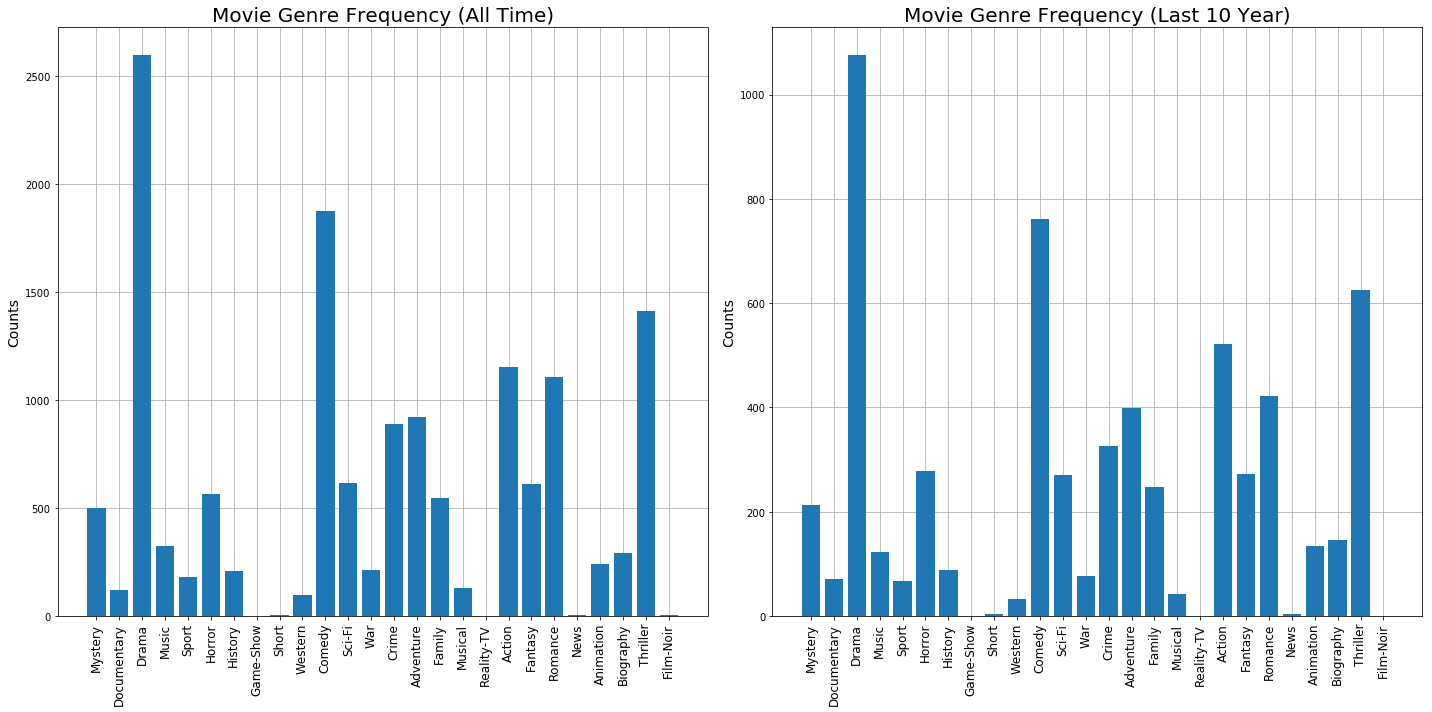

In [6]:
# Set the figure size
plt.figure(figsize=(20,10))

# Creates two subplots
plt.subplot(1, 2, 1)
plt.bar(x_pos, freq, align = 'center', zorder = 3)
plt.xticks(x_pos, objects, rotation = 90, fontsize = 12)
plt.ylabel('Counts', fontsize = 14)
plt.title('Movie Genre Frequency (All Time)', fontsize = 20)
plt.grid(zorder = 0)

plt.subplot(1, 2, 2)
plt.bar(x_pos, freq_10yr, align = 'center', zorder = 3)
plt.xticks(x_pos, objects, rotation = 90, fontsize = 12)
plt.ylabel('Counts', fontsize = 14)
plt.title('Movie Genre Frequency (Last 10 Year)', fontsize = 20)
plt.grid(zorder = 0)


plt.tight_layout()
plt.show()

From the Bar Chart above, we can seet that Drama is the most popular genre of movies. The the popularity of each genre stayed relatively the same. But looking closely, Action movies are slowly becoming more popular in the last 10 years as you can see the difference between Action and Romance are gradually growing.

# Want to focus analysis on Action and Romance

In [7]:
# Locate all the movies with action in the genre excluding romance
act_df = dat_df.loc[lambda x: dat_df['Genre'].str.contains('Action')]
act_df = act_df[act_df['Genre'].str.contains('Romance') == False]
act_df = act_df.reset_index(drop = True)


# Locate all the movies with romance in the genre excluding action
rom_df = dat_df.loc[lambda x: dat_df['Genre'].str.contains('Romance')]
rom_df = rom_df[rom_df['Genre'].str.contains('Action') == False]
rom_df = rom_df.reset_index(drop = True)


# Group the action movies by years and count the numbers of action movies produced that year
num_act_df = act_df.groupby('Year').count()

# Group the romance movies by years and count the numbers of romance movies produced that year
num_rom_df = rom_df.groupby('Year').count()

In [8]:
# Create a Function to categorize the years into decades
def year_to_decade(var):
    decade = []
    ind = var
    counts = []
    for x in var.index:
        if x < 1970:
            counts.append(ind[x])
            x = 'x < 1970'
            decade.append(x)
        elif x < 1980 and x >= 1970:
            counts.append(ind[x])
            x = '1970 <= x < 1980'
            decade.append(x)
        elif x < 1990 and x >= 1980:
            counts.append(ind[x])
            x = '1980 <= x < 1990'
            decade.append(x)
        elif x < 2000 and x >= 1990:
            counts.append(ind[x])
            x = '1990 <= x < 2000'
            decade.append(x)
        elif x < 2010 and x >= 2000:
            counts.append(ind[x])
            x = '2000 <= x < 2010'
            decade.append(x)
        elif x >= 2010:
            counts.append(ind[x])
            x = '2010 <= x'
            decade.append(x)
    return pd.DataFrame(decade, counts).reset_index();

# Graphs the total number of movies produced over the decades

In [9]:
# Create a new data frame for action movies in decade
dec_act_df = year_to_decade(num_act_df['Movie'])
dec_act_df.columns = ['Movie', 'Decade']
dec_act_df = dec_act_df.groupby('Decade').mean()
dec_act_df = pd.concat([dec_act_df.iloc[5:], dec_act_df.iloc[0:5]])

# Create a new data frame for action movies in decade
dec_rom_df = year_to_decade(num_rom_df['Movie'])
dec_rom_df.columns = ['Movie', 'Decade']
dec_rom_df = dec_rom_df.groupby('Decade').mean()
dec_rom_df = pd.concat([dec_rom_df.iloc[5:], dec_rom_df.iloc[0:5]])


# Assign variable for line plot (action movies)
act_objects = dec_act_df['Movie'].index
act_count = dec_act_df['Movie']
 
# Assign variable for line plot (romance movies)
rom_count = dec_rom_df['Movie']

# Set position on x-axis
x_pos = np.arange(len(act_objects))      

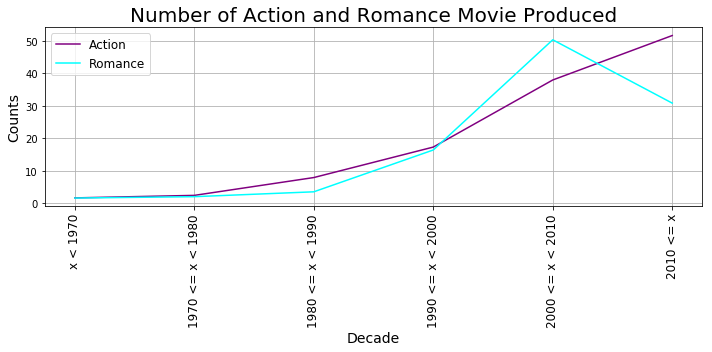

In [10]:
#Compare Action and Romance movies by the numbers produced over the decades
plt.figure(figsize=(10,5))
plt.plot(x_pos, act_count, color = 'purple', zorder = 3, label = 'Action')
plt.plot(x_pos, rom_count, color = 'cyan', zorder =3, label = 'Romance')

# graphs
plt.xticks(x_pos, act_objects, rotation = 90, fontsize = 12)
plt.ylabel('Counts', fontsize = 14)
plt.xlabel('Decade', fontsize = 14)
plt.title('Number of Action and Romance Movie Produced', fontsize = 20)
plt.grid(zorder = 0)

# create a legend 
plt.legend(fontsize = 'large')

plt.tight_layout()
plt.show()

# Shows the popularity of action and romance movies

In [11]:
# Want to show the populatrity of the two genre by calculating the imdb, facebook likes, 
# critic reviews, and user reviews from movies produces from each decade
pop_act_df = act_df[['Year', 'Facebook Likes', 'Number of Critic Reviews', 'Number of User Reviews']]
pop_rom_df = rom_df[['Year', 'Facebook Likes', 'Number of Critic Reviews', 'Number of User Reviews']]

## Action
# Categorize the movie populatiry by decades
pop_act_df = pop_act_df.groupby('Year').sum()
pop_act_df = year_to_decade(pop_act_df['Facebook Likes']) 
pop_act_df.columns = ['Facebook Likes', 'Decade']
pop_act_df['Facebook Likes'] /= 1e3

# Create temporary column to store facebook likes, critic reviews, and user reviews
temp_df = act_df[['Year', 'Number of Critic Reviews', 'Number of User Reviews']]
temp_df = act_df.groupby('Year').sum()

# Add Number of Critic Reviews column (Thousands)
cr_temp_df = year_to_decade(temp_df['Number of Critic Reviews'])
pop_act_df['Number of Critic Reviews'] = cr_temp_df['index'] / 1e3

# Add Number of User Reviews column (Thousands)
ur_temp_df = year_to_decade(temp_df['Number of User Reviews'])
pop_act_df['Number of User Reviews'] = ur_temp_df['index'] / 1e3

# Caluclate the mean from each category for decades
pop_act_df = pop_act_df.groupby('Decade').mean()
pop_act_df = pd.concat([pop_act_df.iloc[5:], pop_act_df.iloc[0:5]])


## Romance
# Categorize the movie populatiry by decades
pop_rom_df = pop_rom_df.groupby('Year').sum()
pop_rom_df = year_to_decade(pop_rom_df['Facebook Likes']) 
pop_rom_df.columns = ['Facebook Likes', 'Decade']
pop_rom_df['Facebook Likes'] /= 1e3

# Create temporary column to store facebook likes, critic reviews, and user reviews
temp_df = rom_df[['Year', 'Number of Critic Reviews', 'Number of User Reviews']]
temp_df = rom_df.groupby('Year').sum()

# Add Number of Critic Reviews column (Thousands)
cr_temp_df = year_to_decade(temp_df['Number of Critic Reviews'])
pop_rom_df['Number of Critic Reviews'] = cr_temp_df['index'] / 1e3

# Add Number of User Reviews column (Thousands)
ur_temp_df = year_to_decade(temp_df['Number of User Reviews'])
pop_rom_df['Number of User Reviews'] = ur_temp_df['index'] / 1e3

# Caluclate the mean from each category for decades
pop_rom_df = pop_rom_df.groupby('Decade').mean()
pop_rom_df = pd.concat([pop_rom_df.iloc[5:], pop_rom_df.iloc[0:5]])

In [12]:
# Assign variable for line plot (action movies)
act_objects = pop_act_df['Facebook Likes'].index
fb_act_sum = pop_act_df['Facebook Likes']
cr_act_sum = pop_act_df['Number of Critic Reviews']
ur_act_sum = pop_act_df['Number of User Reviews']

# Assign variable for line plot (romance movies)
fb_rom_sum = pop_rom_df['Facebook Likes']
cr_rom_sum = pop_rom_df['Number of Critic Reviews']
ur_rom_sum = pop_rom_df['Number of User Reviews']


# Set position on x-axis
x_pos = np.arange(len(act_objects))    

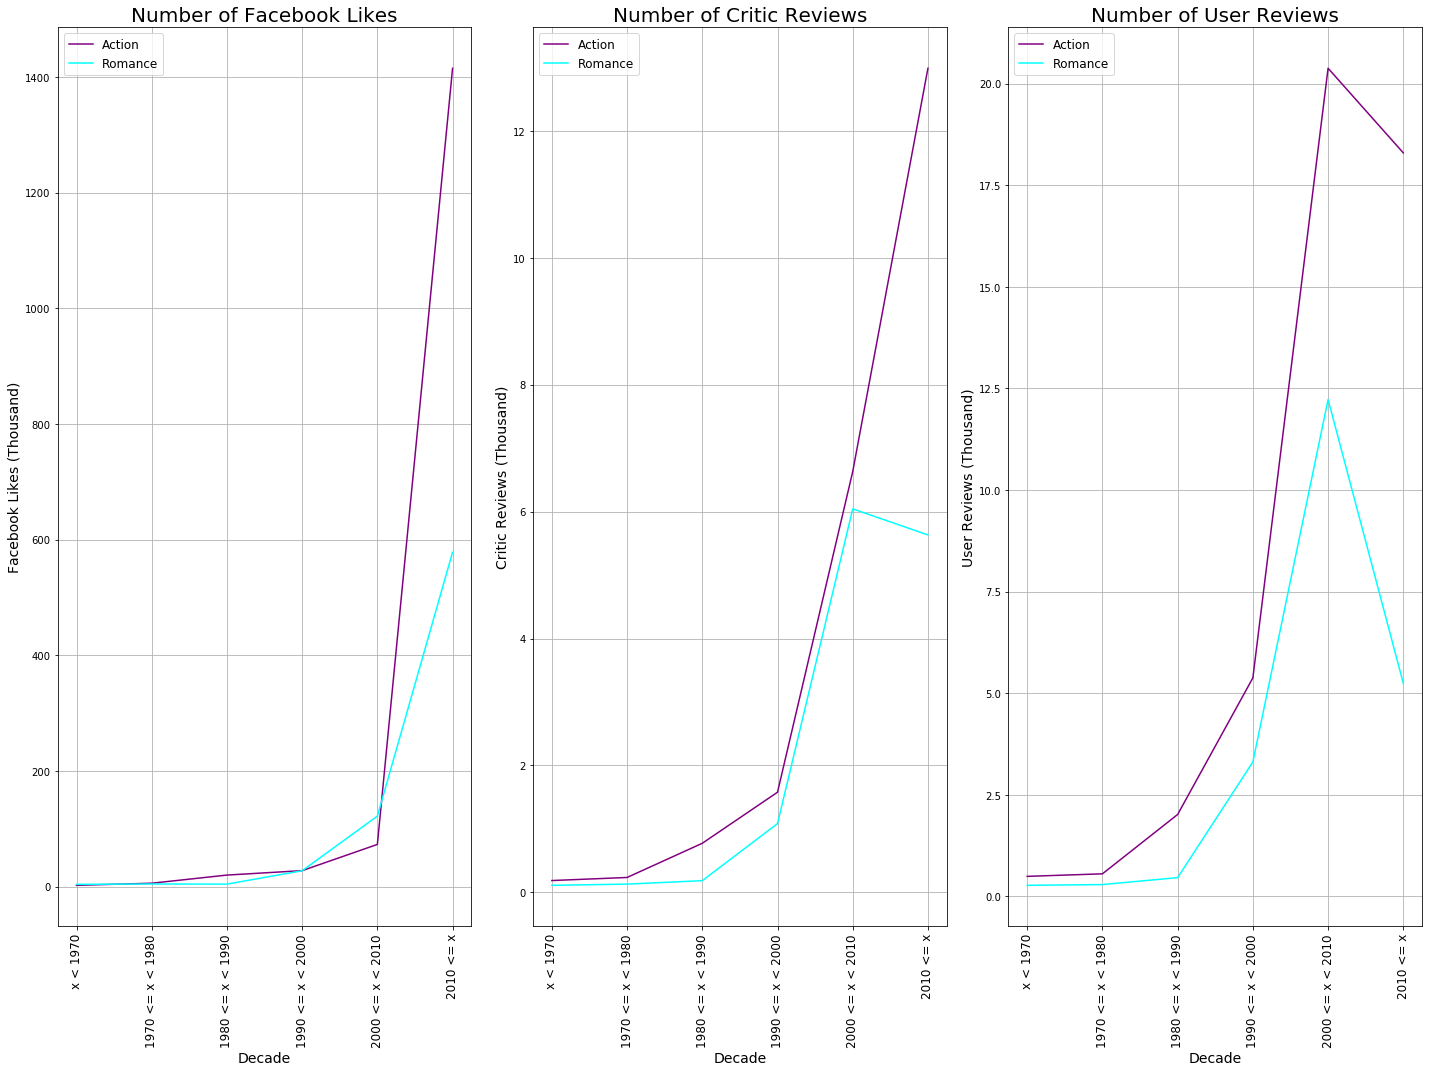

In [13]:
#Compare Action and Romance movies by the numbers produced over the decades
plt.figure(figsize=(20,15))

## graphs for Facebook Likes
plt.subplot(1, 3, 1)
plt.plot(x_pos, fb_act_sum, color = 'purple', zorder = 3, label = 'Action')
plt.plot(x_pos, fb_rom_sum, color = 'cyan', zorder =3, label = 'Romance')

plt.xticks(x_pos, act_objects, rotation = 90, fontsize = 12)
plt.ylabel('Facebook Likes (Thousand)', fontsize = 14)
plt.xlabel('Decade', fontsize = 14)
plt.title('Number of Facebook Likes', fontsize = 20)
plt.grid(zorder = 0)

# create a legend 
plt.legend(fontsize = 'large')


## graphs for Critic Reviews
plt.subplot(1, 3, 2)
plt.plot(x_pos, cr_act_sum, color = 'purple', zorder = 3, label = 'Action')
plt.plot(x_pos, cr_rom_sum, color = 'cyan', zorder =3, label = 'Romance')

plt.xticks(x_pos, act_objects, rotation = 90, fontsize = 12)
plt.ylabel('Critic Reviews (Thousand)', fontsize = 14)
plt.xlabel('Decade', fontsize = 14)
plt.title('Number of Critic Reviews', fontsize = 20)
plt.grid(zorder = 0)

# create a legend 
plt.legend(fontsize = 'large')


## graphs for User Reviews
plt.subplot(1, 3, 3)
plt.plot(x_pos, ur_act_sum, color = 'purple', zorder = 3, label = 'Action')
plt.plot(x_pos, ur_rom_sum, color = 'cyan', zorder =3, label = 'Romance')

plt.xticks(x_pos, act_objects, rotation = 90, fontsize = 12)
plt.ylabel('User Reviews (Thousand)', fontsize = 14)
plt.xlabel('Decade', fontsize = 14)
plt.title('Number of User Reviews', fontsize = 20)
plt.grid(zorder = 0)

# create a legend 
plt.legend(fontsize = 'large')


plt.tight_layout()
plt.show()

From these 3 graphs, we can see that action movies tend to recieve more reviews and likes than romance movies, therefore we can conclude that actio genre attract more people than romance genre

# Want to compare the profit generated by the two genre overtime


In [14]:
# Create a new dataframe to store the budget and gross of action movies
rev_act_df = act_df[['Year', 'Budget', 'Gross']]

# Calculate the profit
profit = rev_act_df.loc[:, 'Gross'] - rev_act_df.loc[:, 'Budget']
rev_act_df['Profit'] = profit

# Categorize the movie profit by decades
profit_act_df = rev_act_df.groupby('Year').sum()
profit_act_df = year_to_decade(profit_act_df['Profit'])
profit_act_df.columns = ['Profit', 'Decade']
profit_act_df = profit_act_df.groupby('Decade').mean()
profit_act_df = pd.concat([profit_act_df.iloc[5:], profit_act_df.iloc[0:5]])


# Create a new dataframe to store the budget and gross of romance movies
rev_rom_df = rom_df[['Year', 'Budget', 'Gross']]

# Calculate the profit
profit = rev_rom_df.loc[:, 'Gross'] - rev_rom_df.loc[:, 'Budget']
rev_rom_df['Profit'] = profit

# Categorize the movie profit by decades
profit_rom_df = rev_rom_df.groupby('Year').sum()
profit_rom_df = year_to_decade(profit_rom_df['Profit'])
profit_rom_df.columns = ['Profit', 'Decade']
profit_rom_df = profit_rom_df.groupby('Decade').mean()
profit_rom_df = pd.concat([profit_rom_df.iloc[5:], profit_rom_df.iloc[0:5]])

C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


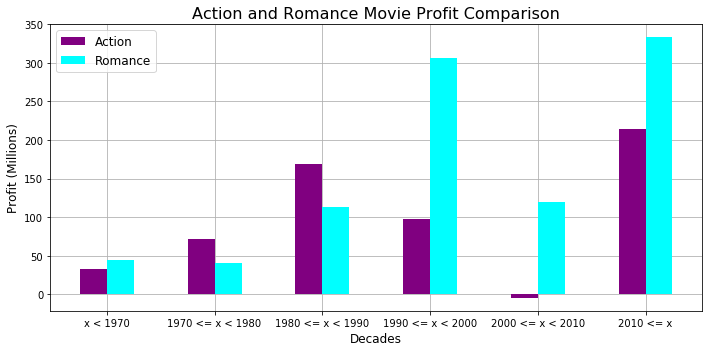

In [15]:
# Assign variable for bar plot (action movies)
act_objects = profit_act_df['Profit'].index
act_sum = profit_act_df['Profit'] / 1e6

# Assign variable for bar plot (romance movies)
rom_objects = profit_rom_df['Profit'].index
rom_sum = profit_rom_df['Profit'] / 1e6

# Set position on x-axis
x_pos = np.arange(len(act_objects))
wid = np.min(np.diff(x_pos))/4


# Set graph size and add subplot to create side-by-side bar plot
plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

ax.bar(x_pos - wid/2, act_sum, width = wid, color = 'purple', label = 'Action', zorder = 3)
ax.bar(x_pos + wid/2, rom_sum, width = wid, color = 'cyan', label = 'Romance', zorder = 3)

ax.set_xticks(x_pos)
ax.set_xticklabels(act_objects, fontsize = 10)
ax.set_ylabel('Profit (Millions)', fontsize = 12)
ax.set_xlabel('Decades', fontsize = 12)
ax.set_title('Action and Romance Movie Profit Comparison', fontsize = 16)
plt.grid(zorder = 0)

# create a legend 
plt.legend(fontsize = 'large')

plt.tight_layout()
plt.show()

From the graph above, we can see that action movies were not always profitable whereas romance movies are always profitable 

# Compares total revenue from each categories

In [16]:
# Set all nan values to 0 for calculation of total revenue
rev_act_df[np.isnan(rev_act_df)] = 0
rev_rom_df[np.isnan(rev_rom_df)] = 0

# total gross, budget, profit for action movies (in billions)
act_gross = sum(rev_act_df['Gross']) / 1e9
act_budget = sum(rev_act_df['Budget']) / 1e9
act_profit = sum(rev_act_df['Profit']) / 1e9

# total gross, budget, profit for romance movies (in billions)
rom_gross = sum(rev_rom_df['Gross']) / 1e9
rom_budget = sum(rev_rom_df['Budget']) / 1e9
rom_profit = sum(rev_rom_df['Profit']) / 1e9

C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mike\Anaconda3\lib\site-packages\pandas\core\frame.py:2464: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-co

In [17]:
# Assign variable for bar plot (action and romance movies's total revenue)
act_rev = [act_budget, act_gross, act_profit]
rom_rev = [rom_budget, rom_gross, rom_profit]
indices = ['Budget', 'Gross', 'Profit']

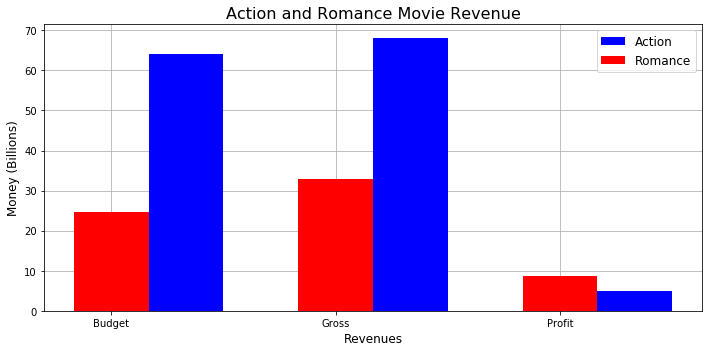

In [18]:
# Set position on x-axis
x_pos = np.arange(len(indices))
wid = np.min(np.diff(x_pos))/3

plt.figure(figsize = (10, 5))
ax = plt.subplot(111)

ax.bar(x_pos + wid, act_rev, width = wid, color = 'blue', label = 'Action', zorder = 3)
ax.bar(x_pos, rom_rev, width = wid, color = 'red', label = 'Romance', zorder = 3)

ax.set_xticks(x_pos)
ax.set_xticklabels(indices, fontsize = 10)
ax.set_ylabel('Money (Billions)', fontsize = 12)
ax.set_xlabel('Revenues', fontsize = 12)
ax.set_title('Action and Romance Movie Revenue', fontsize = 16)
plt.grid(zorder = 0)

# create a legend 
plt.legend(fontsize = 'large')

plt.tight_layout()
plt.show()

This bar graph compares the total amount of revenues (budget) spent to produce movies and the total amount of revenues (gross) made from the box offices. In the end, compare the profit of the two genre of movies. We can see that although the industry spent less money producing Romance movies, it has a greater profit margin.

# Want to show the distribution of movies throughout the year

In [19]:
# store array for action movies by the year they are made
yr_act_df = act_df['Year']
yr_act_df[np.isnan(yr_act_df)] = 0
yr_act_df = yr_act_df[lambda x: yr_act_df != 0]

# store array for romance movies by the year they are made
yr_rom_df = rom_df['Year']
yr_rom_df[np.isnan(yr_rom_df)] = 0
yr_rom_df = yr_rom_df[lambda x: yr_rom_df != 0]

C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


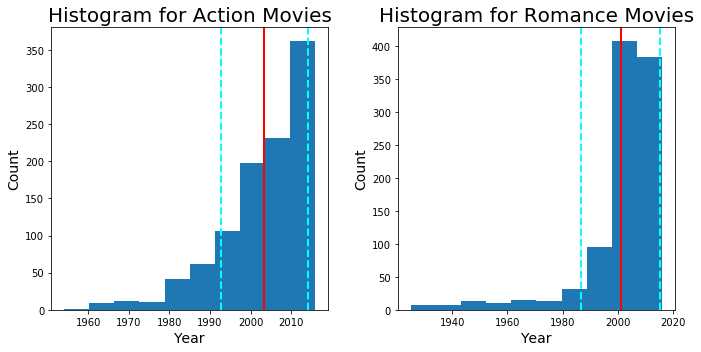

In [25]:
plt.figure(figsize = (10, 5))

# Plot histogram for action movies produced
plt.subplot(1, 2, 1)
plt.hist(yr_act_df)

#Add a vertical line at mean and standard deviation
plt.axvline(yr_act_df.mean(), color = 'red', linestyle = 'solid', linewidth = 2)
plt.axvline(yr_act_df.mean() + yr_act_df.std(), color = 'cyan', linestyle = 'dashed', linewidth = 2)
plt.axvline(yr_act_df.mean() - yr_act_df.std(), color = 'cyan', linestyle = 'dashed', linewidth = 2)
plt.title('Histogram for Action Movies', fontsize = 20)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

# Plot histogram for romance movies produced
plt.subplot(1, 2, 2)
plt.hist(yr_rom_df)

#Add a vertical line at mean and standard deviation
plt.axvline(yr_rom_df.mean(), color = 'red', linestyle = 'solid', linewidth = 2)
plt.axvline(yr_rom_df.mean() + yr_rom_df.std(), color = 'cyan', linestyle = 'dashed', linewidth = 2)
plt.axvline(yr_rom_df.mean() - yr_rom_df.std(), color = 'cyan', linestyle = 'dashed', linewidth = 2)
plt.title('Histogram for Romance Movies', fontsize = 20)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Count', fontsize = 14)


plt.tight_layout()
plt.show()

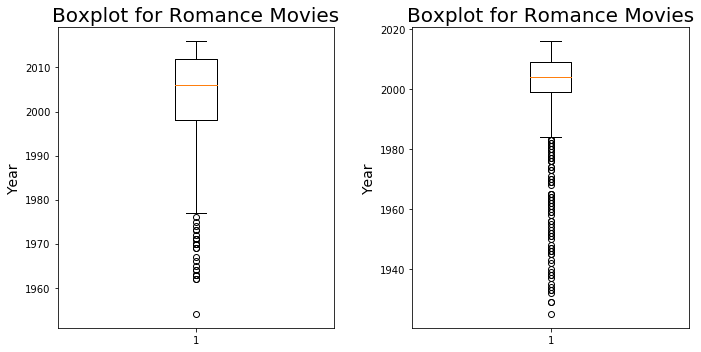

In [40]:
plt.figure(figsize = (10, 5))

# Plot boxplot for action movies produced
plt.subplot(1, 2, 1)
plt.boxplot(yr_act_df)
plt.title('Boxplot for Romance Movies', fontsize = 20)
plt.ylabel('Year', fontsize = 14)

# Plot boxplot for romance movies produced
plt.subplot(1, 2, 2)
plt.boxplot(yr_rom_df)
plt.title('Boxplot for Romance Movies', fontsize = 20)
plt.ylabel('Year', fontsize = 14)

plt.tight_layout()
plt.show()

Both historgram are heavily skewed to the right, which means that most movies are produced after the 1980s. We can see that over 2/3 of the movies produced for both genre are clustered around the mean (around year 2000).

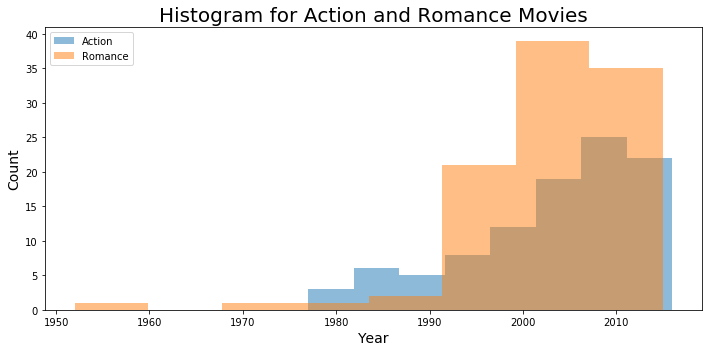

In [38]:
plt.figure(figsize = (10, 5))

# Randomly choice 100 samples with replacement 
act_sample = np.random.choice(yr_act_df, 100, replace = True)
rom_sample = np.random.choice(yr_rom_df, 100, replace = True)

# Plot 2 histograms together
plt.hist(act_sample, alpha = 0.5, label = 'Action', bins = 8)
plt.hist(rom_sample, alpha = 0.5, label = 'Romance', bins = 8)
plt.title('Histogram for Action and Romance Movies', fontsize = 20)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

In [22]:
print(act_sample.mean())
print(rom_sample.mean())
print(act_sample.std())
print(rom_sample.std())

# Compute the difference between the two sample means.
diff = rom_sample.mean( ) - act_sample.mean()
print(diff)

2004.46
2000.38
11.6819690121
14.4123419332
-4.08


In [23]:
size = np.array([len(act_sample), len(rom_sample)])
sd = np.array([act_sample.std(), rom_sample.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

-2.19920049371


In [24]:
from scipy.stats import ttest_ind
print(ttest_ind(act_sample, rom_sample, equal_var=False))

Ttest_indResult(statistic=2.1881768629167193, pvalue=0.029877468753998881)
